In [69]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

california = datasets.fetch_california_housing()

In [70]:
dframe = pd.read_csv("forestfires_wo_category.csv")
#dframe.columns = california.feature_names
#dframe.columns = "age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"
#dframe["MedianHouseValue"] = california.target
print(dframe.head())


   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


       FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1 -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2 -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4 -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   

       rain     area  
0 -0.073268 -0.20202  
1 -0.073268 -0.20202  
2 -0.073268 -0.20202  
3  0.603155 -0.20202  
4 -0.073268 -0.20202  


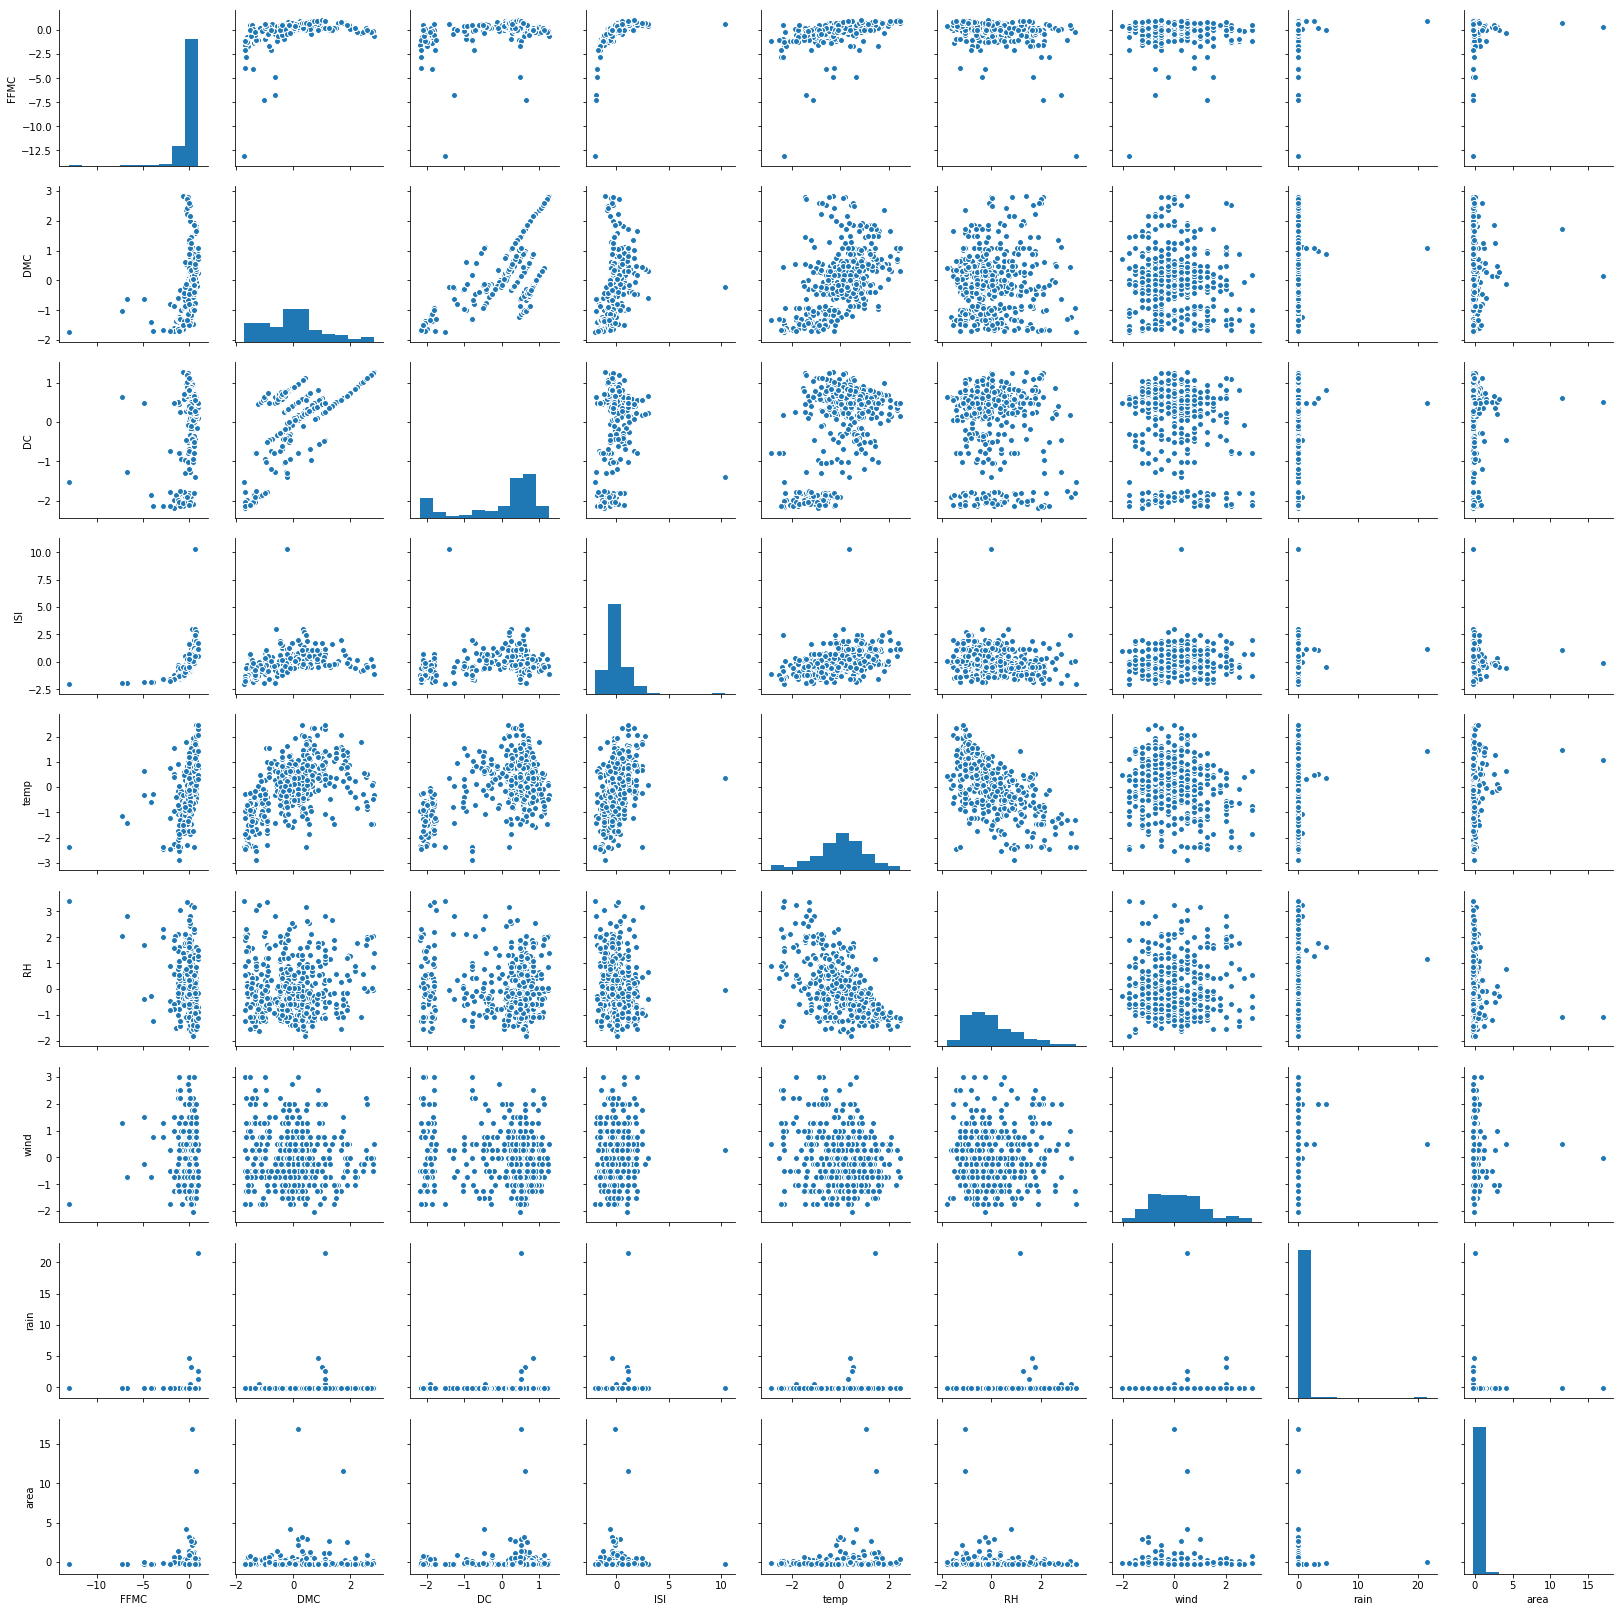

In [72]:
#get BMI data and modificate it to ndarray
california_X = california.data[:,np.newaxis,7]
#print(california_X)
#california_X_panda = dframe["bmi"]
#print(np.reshape(california_X_panda.values,[california_X_panda.values.shape[0],1]).shape)

#split data into training/test
california_X_train = california_X[:-20]
california_X_test = california_X[-20:]
california_Y_train = california.target[:-20]
california_Y_test = california.target[-20:]

#make standarized df
df_standarized = pd.DataFrame(scipy.stats.zscore(dframe),index=dframe.index,columns=dframe.columns)
df_minmax = (dframe - dframe.min()) / (dframe.max() - dframe.min())
print(df_standarized.head())
#sb.jointplot("rain","area",data=df_standarized)
sb.pairplot(df_standarized)

In [16]:


#create model
regre = linear_model.LinearRegression()
ridge = linear_model.Ridge(alpha=.5)
lasso =  linear_model.Lasso(alpha=0.1)

#Train model
regre.fit(california_X_train, california_Y_train)
ridge.fit(california_X_train, california_Y_train)
lasso.fit(california_X_train, california_Y_train)

#Make predictions using the test data
california_y_pred = regre.predict(california_X_test)
ridge_y_pred = ridge.predict(california_X_test)
lasso_y_pred = lasso.predict(california_X_test)

#print(california_y_pred)
#coefficients
#回帰係数。y=ax+bのaにあたる
print("Coefficiens:",regre.coef_)
print("Coefficiens_ridge:",ridge.coef_)
print("Coefficiens_lasso:",lasso.coef_)

#Mean Squared Error
#平均二乗誤差。小さければ性能が良い。
print("Mean Squared Error:",mean_squared_error(california_Y_test,california_y_pred))
print("Mean Squared Error_ridge:",mean_squared_error(california_Y_test,ridge_y_pred))
print("Mean Squared Error_lasso:",mean_squared_error(california_Y_test,lasso_y_pred))

#R^2
#決定係数。１に近いほど性能が良い。
print("R^2:",r2_score(california_Y_test,california_y_pred))
print("R^2_ridge:",r2_score(california_Y_test,ridge_y_pred))
print("R^2_lasso:",r2_score(california_Y_test,lasso_y_pred))

Coefficiens: [306.72757499]
Coefficiens_ridge: [201.9829032]
Coefficiens_lasso: [262.9592651]
Mean Squared Error: 5472.264673097904
Mean Squared Error_ridge: 5467.31122154716
Mean Squared Error_lasso: 5465.40435363952
R^2: -0.1327020163062087
R^2_ridge: -0.13167670322389635
R^2_lasso: -0.13128200134947288


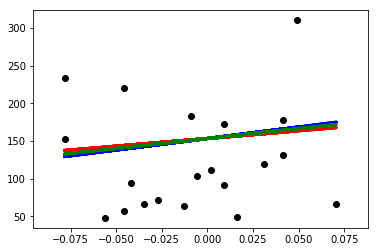

In [17]:
# Plot outputs
plt.scatter(california_X_test, california_Y_test,  color='black')
plt.plot(california_X_test, california_y_pred, color='blue', linewidth=3)
plt.plot(california_X_test, ridge_y_pred, color='red', linewidth=3)
plt.plot(california_X_test, lasso_y_pred, color='green', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()